In [18]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load Data ---
data = pd.read_csv("synthetic_customer_data.csv")
data_model = data.copy()


In [19]:
# Encode categorical variables
data_model = pd.get_dummies(data_model, drop_first=True)

# Define target and features
X = data_model.drop(columns=['is_churned'])  # adjust if needed
y = data_model['is_churned']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Fit logistic regression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[339   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [22]:
##  class imbalance – there are way more non-churners (0) than churners (1), 
## so the model learns to predict everything as the majority class to optimize accuracy.

In [23]:
# Evaluation: ROC
#from sklearn.metrics import roc_auc_score, roc_curve
#import matplotlib.pyplot as plt

#y_proba = model.predict_proba(X_test)[:, 1]
#fpr, tpr, _ = roc_curve(y_test, y_proba)

#plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
#plt.plot([0, 1], [0, 1], "--", color="gray")
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC Curve")
#plt.legend()
#plt.show()

In [24]:
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
#print("Random Forest AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

In [25]:
## SMOTE to balance the classes then train the model again 
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# SMOTE on the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

# Step 4: Train your model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate on the test set
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Before SMOTE: Counter({0: 1358, 1: 242})
After SMOTE: Counter({0: 1358, 1: 1358})
[[339   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       0.00      0.00      0.00        61

    accuracy                           0.85       400
   macro avg       0.42      0.50      0.46       400
weighted avg       0.72      0.85      0.78       400



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [29]:
## Model still predicts zeros only 

In [34]:
#Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [36]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

Confusion Matrix:
 [[339   0]
 [ 60   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       1.00      0.02      0.03        61

    accuracy                           0.85       400
   macro avg       0.92      0.51      0.48       400
weighted avg       0.87      0.85      0.78       400



In [38]:
# Grid Search 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Setup the grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1',  # focus on improving class 1
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit to training data (X_train_resampled, y_train_resampled after SMOTE)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[339   0]
 [ 60   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       339
           1       1.00      0.02      0.03        61

    accuracy                           0.85       400
   macro avg       0.92      0.51      0.48       400
weighted avg       0.87      0.85      0.78       400

[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200; total time=   5.1s
[CV] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimator

In [41]:
# changing the threshold on predictions
y_proba = best_rf.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[315  24]
 [ 52   9]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       339
           1       0.27      0.15      0.19        61

    accuracy                           0.81       400
   macro avg       0.57      0.54      0.54       400
weighted avg       0.77      0.81      0.79       400



In [42]:
from sklearn.metrics import roc_auc_score

y_proba = best_rf.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

ROC AUC: 0.6978819091832293


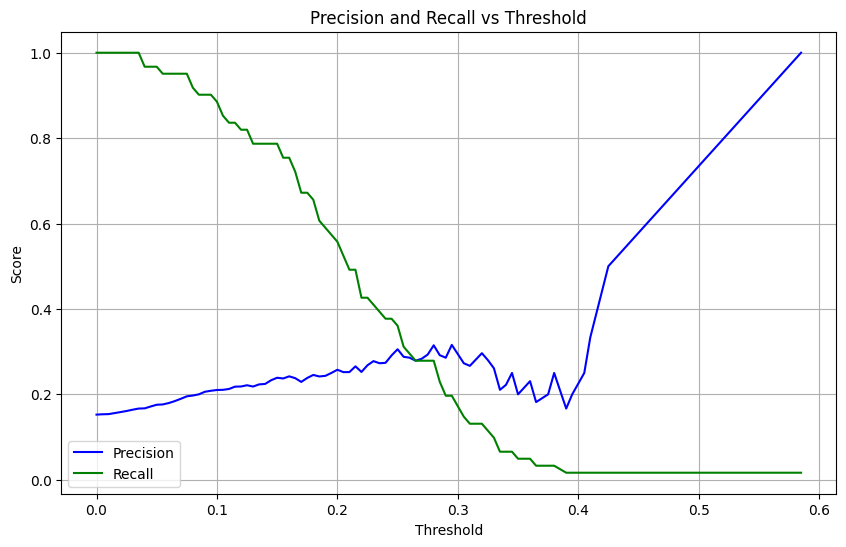

In [44]:
# Precision and Recall vs Threshold
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities for class 1
y_scores = best_rf.predict_proba(X_test)[:, 1]

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

Best Threshold: 0.029, Best F1-Score: 0.386


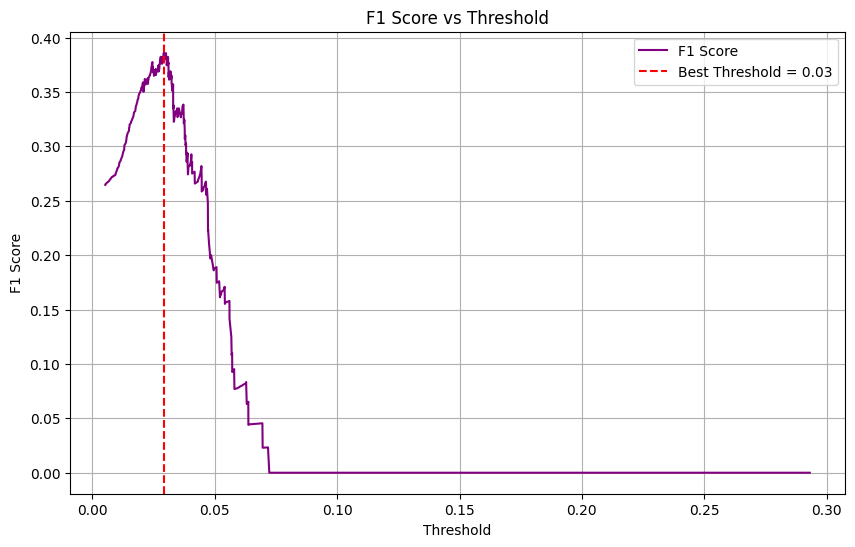

In [45]:
# F1 vs Threshold

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]  # assuming binary classification

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Avoid division by zero
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Plot F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", color='purple')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid()
plt.legend()

# Best threshold
best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)
print(f"Best Threshold: {best_thresh:.3f}, Best F1-Score: {best_f1:.3f}")

plt.axvline(x=best_thresh, color='red', linestyle='--', label=f"Best Threshold = {best_thresh:.2f}")
plt.legend()
plt.show()